In [1]:
import numpy as np
from scipy.stats import norm
import numpy as np
import astropy
from astropy.io import fits
from astropy import units as u
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import healpy as hp
import pandas as pd
import math
import scipy
import statistics as st
from scipy import stats
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from IPython.display import Image

%matplotlib inline

NSIDE=2048
Npix=12*NSIDE**2

pi=math.pi

import warnings
warnings.filterwarnings('ignore')

---

### Read in MMF3

In [2]:
mmf3 = pd.read_csv('MMF3Data.csv')
mmf3['GLAT'] = np.around(mmf3['GLAT'].values,1)
mmf3['GLON'] = np.around(mmf3['GLON'].values,1)
print(mmf3.iloc[0,3]) # glat
print(mmf3.iloc[0,2]) # glon

45.1
0.0


In [3]:
# hp.mollview(mask,norm='hist',coord=['G'],title='Masked S/N map')
# hp.visufunc.projscatter(mmf3['GLON'],mmf3['GLAT'],c='b',lonlat=True,s=10)

### Check against intersection mask

In [4]:
mask = hp.read_map('HFI_PCCS_SZ-selfunc-inter-cosmo_2.02.fits')

# Get the nside and number of pixels in your map
nside = hp.get_nside(mask)
npix = hp.nside2npix(nside)
maskedPixels, = np.where(mask == 0)

# Use pix2ang to get the (l, b) coordinates for each pixel
glons, glats = hp.pix2ang(nside, maskedPixels, lonlat=True)
maskedArray = pd.DataFrame({'glon': np.around(glons,1), 'glat': np.around(glats,1)})
maskedArray = maskedArray[(maskedArray.glat > 6)|(maskedArray.glat<-6)].reset_index()

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [5]:
interLons = []
interLats = []

for i in range(mmf3.shape[0]):
    matchFlag=False
    for j in range(11): # Within 1 degree
        print(i,mmf3.iloc[i][2],mmf3.iloc[i][3])
        if not maskedArray.loc[np.logical_and(maskedArray.glon == mmf3.iloc[i][2]+j/10, maskedArray.glat == mmf3.iloc[i][3]+j/10)].empty:
            print("MATCH")
            matchFlag=True
            interLons.append(mmf3.iloc[i][2])
            interLats.append(mmf3.iloc[i][3])
            break
    if not matchFlag:
        for j in range(11): # Within 1 degree
            print(i,mmf3.iloc[i][2],mmf3.iloc[i][3])
            if not maskedArray.loc[np.logical_and(maskedArray.glon == mmf3.iloc[i][2]-j/10, maskedArray.glat == mmf3.iloc[i][3]-j/10)].empty:
                print("MATCH")
                matchFlag=True
                interLons.append(mmf3.iloc[i][2])
                interLats.append(mmf3.iloc[i][3])
                break
masked = pd.DataFrame({'glon': interLons, 'glat': interLats})

0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
MATCH
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
4 2.1 -68.3
4 2.1 -68.3
4 2.1 -68.3
4 2.1 -68.3
4 2.1 -68.3
4 2.1 -68.3
4 2.1 -68.3
4 2.1 -68.3
4 2.1 -68.3
4 2.1 

35 12.6 -20.1
35 12.6 -20.1
MATCH
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
36 12.8 49.7
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
37 13.1 -75.5
38 13.7 -45.5
38 13.7 -45.5
38 13.7 -45.5
38 13.7 -45.5
38 13.7 -45.5
MATCH
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
39 14.1 38.4
40 14.7 -6

76 28.0 -69.9
76 28.0 -69.9
76 28.0 -69.9
76 28.0 -69.9
77 28.1 25.4
MATCH
78 28.2 -8.6
MATCH
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
79 28.6 50.1
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
80 28.8 -33.6
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
81 28.9 60.1
82 29.1 44.5
82 29.1 44.5


115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
115 41.4 29.1
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
116 42.2 63.0
117 42.3 17.5
MATCH
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
118 42.8 56.6
119 42.8 -83.0
119 42.8 -83.0
119 42.8 -83.0
119 42.8 -8

147 49.1 25.2
147 49.1 25.2
147 49.1 25.2
147 49.1 25.2
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
MATCH
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49

174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
174 56.8 36.3
175 56.8 -11.6
MATCH
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
178 57.1 11.2
MATCH
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
1

207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
208 65.8 -83.8
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
209 65.9 31.6
210 66.0 -23.3
210 66.0 -23.3
210 66.0 -23.3
210 66.0 -23.3
210 66.0 -23.3
210 66.0 -23.3
210 66.0 -23.3
210 66.0 -23.3
210 66.0 -23.3
210 66.0 -23.3
210 66.0 -23.3
210 66.0 -23.3
210 66.0 -23.3
210 66.0 -23.3
210 66.0 -23.3
210 66.0 -2

236 72.3 -78.4
236 72.3 -78.4
236 72.3 -78.4
236 72.3 -78.4
236 72.3 -78.4
236 72.3 -78.4
236 72.3 -78.4
236 72.3 -78.4
236 72.3 -78.4
236 72.3 -78.4
236 72.3 -78.4
236 72.3 -78.4
236 72.3 -78.4
236 72.3 -78.4
237 72.6 -43.3
MATCH
238 72.6 41.5
238 72.6 41.5
238 72.6 41.5
238 72.6 41.5
238 72.6 41.5
MATCH
239 72.8 -18.7
MATCH
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
240 72.8 -41.1
MATCH
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
241 73.3 67.5
242 73.4 -80.0
242 73.4 -80.0
242 73.4 -80.0
242 73.4 -80.

265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
265 80.2 57.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
266 80.4 14.7
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
267 80.4 -33.2
268 80.6 -24.8
268 80.6 -24.8
268 80.6 -24.8
268 80.6 -24.8
268 80.6 -24.8
268 80.

294 84.8 20.7
294 84.8 20.7
294 84.8 20.7
294 84.8 20.7
294 84.8 20.7
294 84.8 20.7
294 84.8 20.7
294 84.8 20.7
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
295 84.8 35.1
296 85.2 39.4
296 85.2 39.4
296 85.2 39.4
296 85.2 39.4
296 85.2 39.4
296 85.2 39.4
296 85.2 39.4
296 85.2 39.4
296 85.2 39.4
296 85.2 39.4
296 85.2 39.4
MATCH
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
297 85.9 25.2
298 86.0 26.7
298 86.0 26.7
298 86.0 26.7
298 86.0 26.7
298 86.0 26.7
298 86.0 26.7
298 86.0 26.7
298 86.0 26.7


331 92.3 -55.7
331 92.3 -55.7
331 92.3 -55.7
331 92.3 -55.7
331 92.3 -55.7
331 92.3 -55.7
331 92.3 -55.7
331 92.3 -55.7
331 92.3 -55.7
331 92.3 -55.7
331 92.3 -55.7
332 92.3 14.2
MATCH
333 92.5 -35.3
MATCH
334 92.6 20.8
334 92.6 20.8
334 92.6 20.8
334 92.6 20.8
334 92.6 20.8
MATCH
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
335 92.7 73.4
336 93.0 -32.4
MATCH
337 93.4 -16.3
337 93.4 -16.3
337 93.4 -16.3
337 93.4 -16.3
337 93.4 -16.3
337 93.4 -16.3
337 93.4 -16.3
337 93.4 -16.3
337 93.4 -16.3
MATCH
338 93.4 -43.2
338 93.4 -43.2
338 93.4 -43.2
338 93.4 -43.2
338 93.4 -43.2
338 93.4 -43.2
338 93.4 -43.2
338 93.4 -43.2
338 93.4 -43.2
338 93.4 -43.2
338 93.4 -43.2
338 93.4 -43.2
338 93.4 -43.2
338 93.4 -43.2
338 93.4 -43.2
338 93.4 -43.2
338 93.4

372 99.5 55.6
372 99.5 55.6
372 99.5 55.6
372 99.5 55.6
372 99.5 55.6
372 99.5 55.6
372 99.5 55.6
372 99.5 55.6
372 99.5 55.6
372 99.5 55.6
372 99.5 55.6
372 99.5 55.6
372 99.5 55.6
373 99.5 34.2
373 99.5 34.2
373 99.5 34.2
373 99.5 34.2
373 99.5 34.2
373 99.5 34.2
373 99.5 34.2
373 99.5 34.2
373 99.5 34.2
373 99.5 34.2
373 99.5 34.2
373 99.5 34.2
373 99.5 34.2
MATCH
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
374 99.6 -58.6
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99.9 58.5
375 99

406 107.1 -39.5
406 107.1 -39.5
406 107.1 -39.5
406 107.1 -39.5
406 107.1 -39.5
406 107.1 -39.5
406 107.1 -39.5
406 107.1 -39.5
406 107.1 -39.5
406 107.1 -39.5
406 107.1 -39.5
406 107.1 -39.5
406 107.1 -39.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
407 107.4 -31.5
408 107.4 -9.6
MATCH
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410

435 114.3 64.9
435 114.3 64.9
435 114.3 64.9
435 114.3 64.9
435 114.3 64.9
435 114.3 64.9
435 114.3 64.9
435 114.3 64.9
435 114.3 64.9
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
4

469 120.7 44.1
469 120.7 44.1
469 120.7 44.1
469 120.7 44.1
469 120.7 44.1
469 120.7 44.1
469 120.7 44.1
469 120.7 44.1
469 120.7 44.1
469 120.7 44.1
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
470 121.0 57.0
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
471 121.1 49.6
472 121.8 51.8
472 121.8 51.8
472 121.8 51.8
472 121.8 51.8
472 121.8 51.8
472 121.8 51.8
472 121.8 51.8
472 121.8 51.8
472 121.8 51.8
472 121.8 51.8
472 121.8 51.8
472 121.8 51.8
472 121.8 

500 128.3 43.1
500 128.3 43.1
500 128.3 43.1
500 128.3 43.1
500 128.3 43.1
500 128.3 43.1
500 128.3 43.1
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
501 130.0 -22.4
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
502 130.2 -17.0
503 130.3 -62.6
503 130.3 -62.6
503 130.3 -62.6
503 130.3 -62.6
503 130.3 -62.6
503 130.3 -62.6
503 130.3 -62.6
503 130.3 -62.6
503 130.3 -62.6
503 130.3 -62.6
503 130.3 -62.6
503 130.3 -62.6

527 138.3 -39.8
527 138.3 -39.8
527 138.3 -39.8
527 138.3 -39.8
527 138.3 -39.8
527 138.3 -39.8
527 138.3 -39.8
527 138.3 -39.8
528 138.6 -10.9
MATCH
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
529 139.0 40.6
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
530 139.0 50.9
531 139.2 56.4
531 139.2 56.4
531 139.2 56.4
531 139.2 56.4
531 139.2 56.4
531 139.2 56.4
531 139.2 56.4
531 139.2 56.4
531 139.2 56.4
531 139.2 56.4
531 139.2 56.4
531 139.2 56.4
531 139.2 

557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
557 148.3 75.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
558 149.3 54.2
559 149.4 -36.8
559 149.4 -36.8
559 149.4 -36.8
559 149.4 -36.8
559 149.4 -36.8
MATCH
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84.2
560 149.6 -84

589 158.5 -42.9
589 158.5 -42.9
589 158.5 -42.9
589 158.5 -42.9
589 158.5 -42.9
589 158.5 -42.9
590 159.4 -40.7
590 159.4 -40.7
590 159.4 -40.7
590 159.4 -40.7
590 159.4 -40.7
590 159.4 -40.7
590 159.4 -40.7
590 159.4 -40.7
590 159.4 -40.7
590 159.4 -40.7
590 159.4 -40.7
590 159.4 -40.7
590 159.4 -40.7
590 159.4 -40.7
590 159.4 -40.7
MATCH
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
591 159.9 -73.5
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 160.8 81.7
592 16

626 172.7 65.3
626 172.7 65.3
626 172.7 65.3
626 172.7 65.3
626 172.7 65.3
626 172.7 65.3
626 172.7 65.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
627 172.9 21.3
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
628 173.0 -53.5
629 173.1 -36.2
MATCH
630 173.8 22.9
630 173.8 22.9
630 173.8 22.9
630 173.8 22.9
630 173.8 22.9
630 173.8 22.9
630 173.8 22.9
630 173.8 22.9
630 173.8 22.9
630 173.8 22.9
630 173.8 22.9
630 173.8 22.9
630 173.8 2

659 185.2 -53.6
659 185.2 -53.6
659 185.2 -53.6
659 185.2 -53.6
659 185.2 -53.6
659 185.2 -53.6
659 185.2 -53.6
659 185.2 -53.6
659 185.2 -53.6
659 185.2 -53.6
660 185.7 -32.2
MATCH
661 186.2 -12.0
MATCH
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
662 186.4 37.3
663 186.5 -13.5
MATCH
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
664 186.6 62.9
665 187.0 38.6
665 187.0 38.6
665 187.0 38.6
665 187.0 38.6
665 187.0 38.6
665 187.0 38.6
665 187.0 38.6
665 187.0

694 198.8 -57.6
694 198.8 -57.6
694 198.8 -57.6
694 198.8 -57.6
694 198.8 -57.6
694 198.8 -57.6
694 198.8 -57.6
694 198.8 -57.6
694 198.8 -57.6
694 198.8 -57.6
694 198.8 -57.6
694 198.8 -57.6
694 198.8 -57.6
694 198.8 -57.6
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
695 198.9 18.2
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
696 199.6 53.4
MATCH
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 1

722 208.6 -74.4
722 208.6 -74.4
722 208.6 -74.4
722 208.6 -74.4
722 208.6 -74.4
722 208.6 -74.4
722 208.6 -74.4
722 208.6 -74.4
722 208.6 -74.4
722 208.6 -74.4
722 208.6 -74.4
722 208.6 -74.4
722 208.6 -74.4
722 208.6 -74.4
722 208.6 -74.4
722 208.6 -74.4
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
723 208.8 -30.7
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
725 209.5 -36.5
725 209.5 -36.5
MATCH
72

754 217.1 40.2
754 217.1 40.2
755 217.4 10.9
755 217.4 10.9
755 217.4 10.9
755 217.4 10.9
755 217.4 10.9
755 217.4 10.9
755 217.4 10.9
755 217.4 10.9
755 217.4 10.9
755 217.4 10.9
755 217.4 10.9
755 217.4 10.9
755 217.4 10.9
755 217.4 10.9
755 217.4 10.9
MATCH
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
756 218.5 71.3
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
757 218.8 35.5
758 219.5 -35.9
758 219.5 -35.9
758 219.5 -35.9
758 219.5 -35.9
758 219.5 -35.9

782 226.3 76.8
782 226.3 76.8
782 226.3 76.8
782 226.3 76.8
782 226.3 76.8
782 226.3 76.8
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
783 226.8 49.0
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
784 227.2 54.8
785 227.4 -31.2
785 227.4 -31.2
785 227.4 -31.2
785 227.4 -31.2
785 227.4 -31.2
785 227.4 -31.2
785 227.4 -31.2
785 227.4 -31.2
785 227.4 -31.2
785 227.4 -31.2
785 227.4 -31.2
785 227.4 -31.2
785 227.4 -31.2
785 227.4 -31.2
785 227.4 -31.2
785 227.4 

808 233.1 23.7
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
809 233.1 -26.3
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
810 233.4 -17.1
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4 -15.4
811 233.4

835 241.1 -28.7
835 241.1 -28.7
835 241.1 -28.7
835 241.1 -28.7
835 241.1 -28.7
835 241.1 -28.7
835 241.1 -28.7
835 241.1 -28.7
835 241.1 -28.7
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
836 241.8 -30.9
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
837 241.8 -24.0
838 241.9 7.8
MATCH
839 242.0 14.9
839 242.0 14.9
839 242.0 14.9
839 242.0 14.9
839 242.0 14.9
839 242.0 14.9
839 242.0 14.9
839 242.0 14.9
839 242.0 14

864 248.0 -26.4
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
865 249.0 -20.7
866 249.1 31.0
866 249.1 31.0
866 249.1 31.0
866 249.1 31.0
866 249.1 31.0
MATCH
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
867 249.1 29.0
868 249.4 33.3
868 249.4 33.3
868 249.4 33.3
868 249.4 33.3
868 249.4 33.3
868 249.4 33.3
868 249.4 33.3
868 249.4 33.3
868 249.4 33.3
868 249.4 33.3
868 249.4 33.3
868 249.4 33.3
868 249.4 33.3
868 249.4 33.3
868 249.4 3

895 254.6 -45.2
895 254.6 -45.2
895 254.6 -45.2
895 254.6 -45.2
895 254.6 -45.2
895 254.6 -45.2
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
896 254.8 -30.5
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
897 254.9 82.3
MATCH
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 255.0 55.9
898 25

920 260.8 -31.3
920 260.8 -31.3
920 260.8 -31.3
920 260.8 -31.3
920 260.8 -31.3
920 260.8 -31.3
920 260.8 -31.3
920 260.8 -31.3
920 260.8 -31.3
920 260.8 -31.3
920 260.8 -31.3
921 260.8 6.7
MATCH
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
922 260.9 -62.2
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
923 261.1 -66.1
924 261.1 34.9
924 261.1 34.9
924 261.1 34.9
924 261.1 34.9
924 261.1 34.9
924 261.1 34.9
924 261.1 

949 266.0 -21.2
949 266.0 -21.2
949 266.0 -21.2
949 266.0 -21.2
949 266.0 -21.2
949 266.0 -21.2
949 266.0 -21.2
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
950 266.6 -27.3
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
951 266.8 25.1
952 266.9 -14.4
MATCH
953 268.3 28.9
953 268.3 28.9
953 268.3 28.9
953 268.3 28.9
953 268.3 28.9
953 268.3 28.9
953 268.3 28.9
953 268.3 28.9
953 268.3 28.9
953 268.3 28.9
953 268.3 28.9
953 268.3 28.9
953 

979 272.9 19.1
979 272.9 19.1
979 272.9 19.1
979 272.9 19.1
979 272.9 19.1
979 272.9 19.1
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 

1017 284.4 52.4
1017 284.4 52.4
1017 284.4 52.4
1017 284.4 52.4
1017 284.4 52.4
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1018 284.6 70.8
1019 285.0 -23.7
MATCH
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
1020 285.2 16.1
MATCH
1021 285.3 -47.4
1021 285.3 -47.4
1021 285.3 -47.4
1021 285.3 -47.4
1021 285.3 -47.4
1021 285.3 -47.4
1021 285.3 -47.4
1021 285.3 -47.4
1021 285.3 -47.4
1021 285.3 -47.4
1021 285.3 -47.4
1021 285.3 -47.4
1021 285.3 -47.

1047 288.1 -39.1
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1048 288.3 40.0
1049 288.6 -37.7
1049 288.6 -37.7
1049 288.6 -37.7
1049 288.6 -37.7
1049 288.6 -37.7
1049 288.6 -37.7
MATCH
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1050 288.9 -33.0
1051 289.2 72.2
1051 289.2 72.2
1051 289.2 72.2
1051 289.2 72.2
1051 289.2 72.2
1051 289.2 72.2
1051 289.2 72.2
1051 289.2 72.2
1051 289.2 72.2
1051 

1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1085 297.2 -44.9
1086 297.3 -34.7
MATCH
1087 297.6 -11.9
MATCH
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.9 31.4
1089 297.

1123 308.4 24.2
1123 308.4 24.2
1123 308.4 24.2
1123 308.4 24.2
1123 308.4 24.2
1123 308.4 24.2
1123 308.4 24.2
1123 308.4 24.2
1123 308.4 24.2
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1124 308.9 -50.6
1125 309.4 13.3
MATCH
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1126 309.4 -72.9
1127 309.5 37.3
1127 309.5 37.3
1127 309.5 37.3
1127 309.5 37.3
1127 309.5 37.3
1127 3

1155 318.0 -58.9
1155 318.0 -58.9
1155 318.0 -58.9
1155 318.0 -58.9
1155 318.0 -58.9
1155 318.0 -58.9
1155 318.0 -58.9
1155 318.0 -58.9
1155 318.0 -58.9
1156 318.1 -29.6
MATCH
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1157 318.0 73.1
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1158 318.6 58.6
1159 319.2 -48.6
1159 319.2 -48.6
1159 319.2 -48.6
1159 319.2 -48.6
1159 319.2 -48.6
1159 319.2 -48.6
1159 319.2 -48.6
1

1184 327.5 25.9
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1185 327.7 -54.3
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
1186 328.1 15.8
MATCH
1187 328.2 18.2
1187 328.2 18.2
1187 328.2 18.2
1187 328.2 18.2
1187 328.2 18.2
1187 328.2 18.2
1187 328.2 18.2
MATCH
1188 328.3 -9.7
MATCH
1189 328.6 -25.3
1189 328.6 -25.3
1189 328.6 -25.3
1189 328.6 -25.3
1189 328.6 -25.3
1189 328.6 -25.3
1189 328.6

1220 339.5 63.6
1220 339.5 63.6
1220 339.5 63.6
1220 339.5 63.6
1220 339.5 63.6
1220 339.5 63.6
1220 339.5 63.6
1220 339.5 63.6
1220 339.5 63.6
1220 339.5 63.6
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1221 339.6 -69.3
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1222 339.7 -51.1
1223 340.1 22.9
MATCH
1224 340.4 60.6
1224 340.4 60.6
1224 340.4 60.6
1224 340.4 60.6
1224 3

1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1248 349.5 -60.0
1249 349.5 -6.8
MATCH
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1250 350.1 45.3
1251 351.7 -54.7
1251 351.7 -54.7
1251 351.7 -54.7
1251 351.7 -54.7
1251 351.7 -54.7
1251 351.7 -54.7
1251 351.7 -54.7
1251 351.7 -54.7
1251 351.7 -54.7
1251 351.7 -54.7
1251 351.7 -54.7
1251 351.7 -54.7
1251 351.7 -54.7
1251 351.7 -54.7
1251 351.7 -54

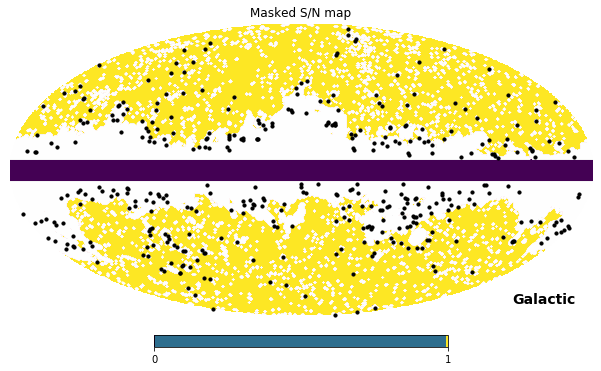

In [6]:
hp.mollview(mask,norm='hist',coord=['G'],title='Masked S/N map')
# hp.visufunc.projscatter(mmf3['GLON'],mmf3['GLAT'],c='b',lonlat=True)
hp.visufunc.projscatter(maskedArray.glon,maskedArray.glat,c='w',lonlat=True,s=0.1)
hp.visufunc.projscatter(interLons, interLats,c='k',lonlat=True,s=10)

### Check against union mask

In [7]:
mask = hp.read_map('HFI_PCCS_SZ-selfunc-union-survey_2.02.fits')

# Get the nside and number of pixels in your map
nside = hp.get_nside(mask)
npix = hp.nside2npix(nside)
maskedPixels, = np.where(mask == 0)

# Use pix2ang to get the (l, b) coordinates for each pixel
glons, glats = hp.pix2ang(nside, maskedPixels, lonlat=True)
maskedArray = pd.DataFrame({'glon': np.around(glons,1), 'glat': np.around(glats,1)})
maskedArray = maskedArray[(maskedArray.glat > 3)|(maskedArray.glat<-3)].reset_index()

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [8]:
# Get the nside and number of pixels in your map
nside = hp.get_nside(mask)
npix = hp.nside2npix(nside)
maskedPixels, = np.where(mask == 0)

# Use pix2ang to get the (l, b) coordinates for each pixel
glons, glats = hp.pix2ang(nside, maskedPixels, lonlat=True)
maskedArray = pd.DataFrame({'glon': np.around(glons,1), 'glat': np.around(glats,1)})
maskedArray = maskedArray[(maskedArray.glat > 12)|((maskedArray.glat<-12) & (maskedArray.glon<180))].reset_index()

In [9]:
unionLons = []
unionLats = []

for i in range(mmf3.shape[0]):
    matchFlag=False
    for j in range(11): # Within 1 degree
        print(i,mmf3.iloc[i][2],mmf3.iloc[i][3])
        if not maskedArray.loc[np.logical_and(maskedArray.glon == mmf3.iloc[i][2]+j/10, maskedArray.glat == mmf3.iloc[i][3]+j/10)].empty:
            print("MATCH")
            matchFlag=True
            unionLons.append(mmf3.iloc[i][2])
            unionLats.append(mmf3.iloc[i][3])
            break
    if not matchFlag:
        for j in range(11): # Within 1 degree
            print(i,mmf3.iloc[i][2],mmf3.iloc[i][3])
            if not maskedArray.loc[np.logical_and(maskedArray.glon == mmf3.iloc[i][2]-j/10, maskedArray.glat == mmf3.iloc[i][3]-j/10)].empty:
                print("MATCH")
                matchFlag=True
                unionLons.append(mmf3.iloc[i][2])
                unionLats.append(mmf3.iloc[i][3])
                break
masked = pd.DataFrame({'glon': unionLons, 'glat': unionLats})

0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
MATCH
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
2 0.4 -41.8
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
4 2.1 -68.3
4 2.1 -68.3
4 2.1 -68.3
4 2.1 -68.3
4 2.1 -68.3
4 2.1 -68.3
4 2.1 -68.3
4 2.1 -68.3
4 2.1 -68.3
4 2.1 

32 11.4 -73.0
32 11.4 -73.0
32 11.4 -73.0
32 11.4 -73.0
32 11.4 -73.0
32 11.4 -73.0
32 11.4 -73.0
32 11.4 -73.0
32 11.4 -73.0
32 11.4 -73.0
32 11.4 -73.0
32 11.4 -73.0
32 11.4 -73.0
32 11.4 -73.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
33 11.7 -38.0
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
34 11.9 -63.5
35 12.6 -20.1
35 12.6 -20.1
35 12.6 -20.1
35 12.6 -20.1
35 12.6 -20.1
35 12.6 -20.1
35 12.6 -20.1
35 12.6 -20.1
35 12.6 -20.1
35 12.6 -20.1
35 12.6 -20.1
35 12.6 -20.1
35 12.6 -20.1
35 12.

61 23.1 86.7
61 23.1 86.7
61 23.1 86.7
61 23.1 86.7
61 23.1 86.7
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
62 23.4 -15.3
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
63 23.9 -13.9
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
64 24.4 22.8
65 24.5 -18.1
65 24.5 -18.1
MATCH

92 33.4 -48.4
92 33.4 -48.4
92 33.4 -48.4
92 33.4 -48.4
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
93 33.8 77.2
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
94 33.8 -46.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
95 34.0 -76.6
96 34.4 51.6
96 34.4 51.6
96 34.4 51.6
96 

120 43.4 -41.3
120 43.4 -41.3
120 43.4 -41.3
120 43.4 -41.3
120 43.4 -41.3
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
121 44.2 48.7
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
122 44.5 -65.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
123 44.6 -20.4
12

148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
148 49.2 65.1
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
149 49.2 30.9
MATCH
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
150 49.3 44.4
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
151 49.7 -49.5
152 49.8 -25.2
152 49.8 -25.2
152 49.8 -25.2
152

176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
176 56.9 -55.1
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
177 57.1 -74.5
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
178 57.1 11.2
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
179 57.2 -45.4
17

204 65.0 16.7
204 65.0 16.7
204 65.0 16.7
204 65.0 16.7
204 65.0 16.7
204 65.0 16.7
204 65.0 16.7
204 65.0 16.7
204 65.0 16.7
204 65.0 16.7
204 65.0 16.7
204 65.0 16.7
204 65.0 16.7
204 65.0 16.7
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
205 65.3 44.5
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
206 65.3 -64.9
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.1
207 65.5 78.

232 71.4 59.5
232 71.4 59.5
232 71.4 59.5
232 71.4 59.5
232 71.4 59.5
232 71.4 59.5
232 71.4 59.5
232 71.4 59.5
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
233 71.6 29.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
234 71.7 -42.8
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -56.6
235 71.8 -

261 78.4 -47.2
261 78.4 -47.2
261 78.4 -47.2
261 78.4 -47.2
261 78.4 -47.2
261 78.4 -47.2
261 78.4 -47.2
261 78.4 -47.2
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
262 78.7 20.1
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
263 79.3 28.4
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.0
264 79.9 15.

290 84.6 -15.9
290 84.6 -15.9
290 84.6 -15.9
290 84.6 -15.9
290 84.6 -15.9
290 84.6 -15.9
290 84.6 -15.9
290 84.6 -15.9
290 84.6 -15.9
290 84.6 -15.9
290 84.6 -15.9
290 84.6 -15.9
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
291 84.7 42.3
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
292 84.7 -58.6
MATCH
293 84.8 -62.2
293 84.8 -62.2
293 84.8 -62.2
293 84.8 -62.2
293 84.8 -62.2
293 84.8 -62.2
293 84.8 -62.2
293 84.8 -62.2
293 84.8 -62.2
293 84.8 -62.2
293 84.8 -62.2
293 84.8 -62.2
293 84.8 -62.2
293 84.8 -6

320 89.8 -39.6
320 89.8 -39.6
320 89.8 -39.6
320 89.8 -39.6
320 89.8 -39.6
320 89.8 -39.6
320 89.8 -39.6
320 89.8 -39.6
320 89.8 -39.6
320 89.8 -39.6
320 89.8 -39.6
320 89.8 -39.6
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
321 90.0 -43.9
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
322 90.0 34.1
323 90.6 33.5
323 90.6 33.5
323 90.6 33.5
323 90.6 33.5
323 90.6 33.5
323 90.6 33.5
323 90.6 33.5
323 90.6 33.5
323 90.6 33.5
323 90.6 33.5
323 90.6 33.5
323 90.6 33.5
323 90.6 33.5


350 95.4 14.4
MATCH
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
351 95.5 16.4
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
352 95.7 -50.0
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
353 96.1 56.2
354 96.4 -20.9
354 96.4 -20.9
354 

383 101.6 -30.0
383 101.6 -30.0
383 101.6 -30.0
383 101.6 -30.0
383 101.6 -30.0
383 101.6 -30.0
383 101.6 -30.0
383 101.6 -30.0
383 101.6 -30.0
383 101.6 -30.0
383 101.6 -30.0
383 101.6 -30.0
383 101.6 -30.0
383 101.6 -30.0
383 101.6 -30.0
383 101.6 -30.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
384 101.6 -59.0
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
385 101.7 -49.2
386 102.9 -31.0
386 102.9 -31.0
386 102.

409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
409 107.7 -58.3
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
410 107.8 -45.5
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
411 108.1 -9.2
412 108.2 -11.6
412 108.2 -11.6
412 108.2 -11.6
412 108.2 -11.6
412 108.2 -11.6
412 108.2 -11.6
412 108.2 -11.6
412 108.2 -11.6
412 108.2 -11.6
412 108.2 -11.6
412 108.2 -11.6
412 108.2 -11.6
412 108.2 -11.

436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
436 114.5 -60.1
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
437 114.4 -21.0
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
438 114.8 -33.7
439 114.

462 118.9 52.4
462 118.9 52.4
462 118.9 52.4
462 118.9 52.4
462 118.9 52.4
463 119.3 -64.7
463 119.3 -64.7
463 119.3 -64.7
MATCH
464 119.4 46.8
464 119.4 46.8
464 119.4 46.8
464 119.4 46.8
464 119.4 46.8
464 119.4 46.8
464 119.4 46.8
464 119.4 46.8
464 119.4 46.8
464 119.4 46.8
464 119.4 46.8
464 119.4 46.8
464 119.4 46.8
464 119.4 46.8
464 119.4 46.8
464 119.4 46.8
MATCH
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
465 119.9 59.1
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
466 120.1 -44.4
MATCH
467 120.3 44.5
46

489 126.1 -49.6
489 126.1 -49.6
489 126.1 -49.6
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
490 126.2 -33.2
491 126.3 65.6
491 126.3 65.6
491 126.3 65.6
491 126.3 65.6
491 126.3 65.6
491 126.3 65.6
491 126.3 65.6
491 126.3 65.6
491 126.3 65.6
491 126.3 65.6
MATCH
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
492 126.4 -19.1
493 126.6 51.6
493 126.6 51.6
493 126.6 51.6
493 126.6 51.6
493 126.6 51.6
493 126.6 51.6
49

516 135.0 36.0
516 135.0 36.0
516 135.0 36.0
516 135.0 36.0
516 135.0 36.0
516 135.0 36.0
516 135.0 36.0
516 135.0 36.0
516 135.0 36.0
516 135.0 36.0
516 135.0 36.0
516 135.0 36.0
516 135.0 36.0
516 135.0 36.0
516 135.0 36.0
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
517 135.2 65.4
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
518 135.2 57.9
519 135.7 32.5
519 135.7 32.5
519 135.7 32.5
519 135.7 32.5
519 135.7 32.5
519 135.7 32.5
519 135.7 32.5
519 135.7 

542 143.3 65.2
542 143.3 65.2
542 143.3 65.2
542 143.3 65.2
542 143.3 65.2
542 143.3 65.2
542 143.3 65.2
542 143.3 65.2
542 143.3 65.2
542 143.3 65.2
542 143.3 65.2
542 143.3 65.2
542 143.3 65.2
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
543 143.5 53.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
544 143.6 42.6
545 144.3 62.9
545 144.3 62.9
545 144.3 62.9
545 144.3 62.9
545 144.3 62.9
545 144.3 62.9
545 144.3 62.9
545 144.3 62.9
545 144.3 62.9
545 144.3 

568 151.2 48.3
568 151.2 48.3
568 151.2 48.3
568 151.2 48.3
568 151.2 48.3
568 151.2 48.3
568 151.2 48.3
568 151.2 48.3
568 151.2 48.3
568 151.2 48.3
568 151.2 48.3
568 151.2 48.3
568 151.2 48.3
568 151.2 48.3
568 151.2 48.3
568 151.2 48.3
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
569 151.9 -75.0
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
570 151.9 11.6
571 152.4 81.3
571 152.4 81.3
571 152.4 81.3
571 152.4 81.3
571 152.4 81.3
571

594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
594 161.4 26.3
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
595 161.9 -48.2
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.0
596 162.5 -72.

620 170.2 9.7
620 170.2 9.7
620 170.2 9.7
620 170.2 9.7
621 171.0 39.4
621 171.0 39.4
621 171.0 39.4
621 171.0 39.4
621 171.0 39.4
621 171.0 39.4
621 171.0 39.4
621 171.0 39.4
621 171.0 39.4
621 171.0 39.4
621 171.0 39.4
621 171.0 39.4
621 171.0 39.4
MATCH
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
622 171.1 -80.4
MATCH
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
623 171.2 -26.0
624 172.0 -40.6
624 172.0 -40.6
6

647 181.4 -44.8
647 181.4 -44.8
647 181.4 -44.8
647 181.4 -44.8
647 181.4 -44.8
647 181.4 -44.8
647 181.4 -44.8
647 181.4 -44.8
647 181.4 -44.8
647 181.4 -44.8
647 181.4 -44.8
647 181.4 -44.8
647 181.4 -44.8
647 181.4 -44.8
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
648 181.7 -68.7
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
649 181.9 -30.8
650 182.4 -28.3
650 182.4 -28.3
650 182.4 -28.3
650 182.4 -28.3
650 182.

672 189.5 -25.1
672 189.5 -25.1
672 189.5 -25.1
672 189.5 -25.1
672 189.5 -25.1
672 189.5 -25.1
672 189.5 -25.1
672 189.5 -25.1
672 189.5 -25.1
672 189.5 -25.1
672 189.5 -25.1
672 189.5 -25.1
672 189.5 -25.1
672 189.5 -25.1
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
673 189.8 -37.3
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
674 190.6 66.5
675 191.0 6.7
675 191.0 6.7
675 191.0 6.7
675 191.0 6.7
675 191.0 6.7
675 191.0 6.7
675 191.0 

697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
697 199.7 37.0
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
698 199.8 46.6
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
699 200.1 77.2
700 200.6 -64.7
700 200.6 -64.7
700 200.6 -64.7
700 200.6 -64.7
700 20

724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
724 209.2 -80.4
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
725 209.5 -36.5
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
726 209.8 10.2
727 210.1 50.9
727 210.1 50.9
727 210.1 50.9
727 210.1 50.9
727 210.1 50.9
727 210.1 50.9
727 210.1 50.9
727 2

749 215.6 22.6
749 215.6 22.6
749 215.6 22.6
749 215.6 22.6
749 215.6 22.6
749 215.6 22.6
749 215.6 22.6
749 215.6 22.6
749 215.6 22.6
749 215.6 22.6
749 215.6 22.6
749 215.6 22.6
749 215.6 22.6
749 215.6 22.6
749 215.6 22.6
749 215.6 22.6
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
750 216.3 10.1
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
751 216.6 47.0
752 216.8 -41.8
752 216.8 -41.8
752 216.8 -41.8
752 216.8 -41.8
752 216.8 -41.8
752 216.8 -41.8
752 

774 224.4 -76.6
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
775 224.5 -30.3
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
776 224.8 13.6
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.5
777 224.9 -79.

800 231.1 -17.3
800 231.1 -17.3
800 231.1 -17.3
800 231.1 -17.3
800 231.1 -17.3
800 231.1 -17.3
800 231.1 -17.3
800 231.1 -17.3
800 231.1 -17.3
800 231.1 -17.3
800 231.1 -17.3
800 231.1 -17.3
800 231.1 -17.3
800 231.1 -17.3
800 231.1 -17.3
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
801 231.6 60.0
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
802 231.7 -7.8
803 231.7 -70.6
803 231.7 -70.6
803 231.7 -70.6
803 231.7 -70.6
803 231.7 -70.6
803 231.7 -70.6
803 

826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
826 239.5 47.9
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
827 239.7 6.8
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
828 239.9 -40.0
829 240.0 

851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
851 244.8 -28.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
852 245.5 -53.6
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7.4
853 245.7 -7

877 251.6 -42.8
877 251.6 -42.8
877 251.6 -42.8
877 251.6 -42.8
877 251.6 -42.8
877 251.6 -42.8
877 251.6 -42.8
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
878 252.2 -50.6
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
879 252.5 20.0
880 253.0 -41.3
880 253.0 -41.3
880 253.0 -41.3
880 253.0 -41.3
880 253.0 -41.3
880 253.0 -41.3
880 253.0 -41.3
880 253.0 -41.3
880 253.0 -41.3
880 253.0 -41.3
880 253.0 -41.3
880 253.0 -41.3
880 253.0 -41.

904 256.2 34.8
904 256.2 34.8
904 256.2 34.8
904 256.2 34.8
904 256.2 34.8
904 256.2 34.8
904 256.2 34.8
904 256.2 34.8
904 256.2 34.8
904 256.2 34.8
904 256.2 34.8
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
905 256.4 44.0
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
906 256.4 32.3
907 256.6 -65.7
907 256.6 -65.7
907 256.6 -65.7
907 256.6 -65.7
907 256.6 -65.7
907 256.6 -65.7
907 256.6 -65.7
907 256.6 -65.7
907 256.6 -65.7
907 256.6 -65.7
907 256.6 -65.7

929 262.3 -35.4
929 262.3 -35.4
929 262.3 -35.4
929 262.3 -35.4
929 262.3 -35.4
929 262.3 -35.4
929 262.3 -35.4
929 262.3 -35.4
929 262.3 -35.4
929 262.3 -35.4
929 262.3 -35.4
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
930 262.4 -25.2
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
931 262.7 -40.9
932 262.8 25.8
932 262.8 25.8
932 262.8 25.8
932 262.8 25.8
932 262.8 25.8
932 262.8 25.8
932 262.8 25.8
932 262.8 25.8


955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
955 269.0 22.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
956 269.0 46.3
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
957 269.0 44.2
958 269.3 -49.9
958 269.3 -49.9
958 269.3 -49.9
958 269.3 -49.9
958 269.3 -49.9
958 2

980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
980 273.6 -30.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
981 273.5 63.3
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.4
982 273.7 -68.

1007 282.1 54.0
1007 282.1 54.0
1007 282.1 54.0
1007 282.1 54.0
1007 282.1 54.0
1007 282.1 54.0
1007 282.1 54.0
1007 282.1 54.0
1007 282.1 54.0
1007 282.1 54.0
1007 282.1 54.0
1007 282.1 54.0
1007 282.1 54.0
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1008 282.1 38.3
1009 282.3 49.9
MATCH
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1010 282.3 -40.2
1011 282.6 20.8
1011 282.6 20.8
1011 282.6 2

1036 287.1 -23.2
1036 287.1 -23.2
1036 287.1 -23.2
1036 287.1 -23.2
1036 287.1 -23.2
1036 287.1 -23.2
1036 287.1 -23.2
1036 287.1 -23.2
1036 287.1 -23.2
1036 287.1 -23.2
1036 287.1 -23.2
1036 287.1 -23.2
1036 287.1 -23.2
1036 287.1 -23.2
1036 287.1 -23.2
1036 287.1 -23.2
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1037 287.2 18.1
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1038 287.2 34.9
1039 287.4 81.1
1039 287

1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1061 292.6 22.0
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1062 292.8 33.5
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063 292.8 -23.8
1063

1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1086 297.3 -34.7
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1087 297.6 -11.9
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26.0
1088 297.9 26

1111 305.9 -25.5
1111 305.9 -25.5
1111 305.9 -25.5
1111 305.9 -25.5
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1112 306.0 -37.2
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
1113 306.0 34.4
MATCH
1114 306.2 11.9
1114 306.2 11.9
1114 306.2 11.9
1114 306.2 11.9
1114 306.2 11.9
1114 306.2 11.9
1114 306.2 11.9
1114 306.2 11.9
1114 306.2 11.9
1114 306.2 11.9
1114 306.2 11.9
1114 306.2 11.9
1114 306

1137 313.0 -30.0
1137 313.0 -30.0
1137 313.0 -30.0
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1138 313.3 61.1
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1139 313.3 30.3
1140 313.6 41.9
1140 313.6 41.9
1140 313.6 41.9
1140 313.6 41.9
1140 313.6 41.9
1140 313.6 41.9
1140 313.6 41.9
1140 313.6 41.9
1140 313.6 41.9
1140 313.6 41.9
1140 313.6 41.9
1140 313.6 41.9
1140 313.6 41.9
1140 313.6 41.9
1140 313.6 41.9
1140 

1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1163 322.4 20.3
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1164 322.6 -49.1
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
1165 322.7 59.5
11

1189 328.6 -25.3
1189 328.6 -25.3
1189 328.6 -25.3
1189 328.6 -25.3
1189 328.6 -25.3
1189 328.6 -25.3
1189 328.6 -25.3
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1190 329.0 72.0
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1191 329.3 29.2
1192 329.4 -9.9
1192 329.4 -9.9
1192 329.4 -9.9
1192 329.4 -9.9
1192 329.4 -9.9
1192 329.4 -9.9
1192 329.4 -9.9
1192 329.4 -9.9
1192 329.4 -9.9
1192 329.4 -9.9
1192 329.4 -9.9
1

1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1215 337.9 -12.2
1216 338.0 22.7
1216 338.0 22.7
1216 338.0 22.7
1216 338.0 22.7
1216 338.0 22.7
1216 338.0 22.7
1216 338.0 22.7
1216 338.0 22.7
1216 338.0 22.7
1216 338.0 22.7
1216 338.0 22.7
1216 338.0 22.7
1216 338.0 22.7
1216 338.0 22.7
1216 338.0 22.7
MATCH
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1217 338.0 -33.6
1218 338.2 22.6
1218 338.2 22.6
1218 338.2 22.6
1218 338.2 22.6
1218 338.2

1242 347.2 -27.4
1242 347.2 -27.4
1242 347.2 -27.4
1242 347.2 -27.4
1242 347.2 -27.4
1242 347.2 -27.4
1242 347.2 -27.4
1242 347.2 -27.4
1242 347.2 -27.4
1242 347.2 -27.4
1242 347.2 -27.4
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1243 347.3 -52.5
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1244 347.6 -35.4
1245 348.4 -25.5
1245 348.4 -25.5
1245 348.4 -25.5
1245 348.4 -25

1267 359.0 -67.3
1267 359.0 -67.3
1267 359.0 -67.3
1267 359.0 -67.3
1267 359.0 -67.3
1267 359.0 -67.3
1267 359.0 -67.3
1267 359.0 -67.3
1267 359.0 -67.3
1267 359.0 -67.3
1267 359.0 -67.3
1267 359.0 -67.3
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1268 359.1 -32.1
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1269 359.7 -8.7
1270 359.7 -7.2
1270 359.7 -7.2
1270 359.7 -7.2
1270 359.7 -7.2
1270 3

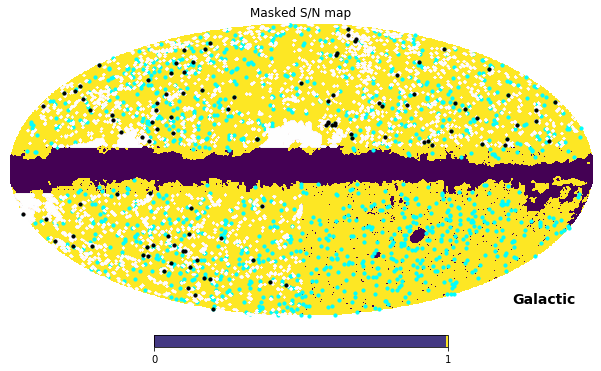

In [14]:
hp.mollview(mask,norm='hist',coord=['G'],title='Masked S/N map')
hp.visufunc.projscatter(mmf3['GLON'],mmf3['GLAT'],c='cyan',lonlat=True,s=10)
hp.visufunc.projscatter(maskedArray.glon,maskedArray.glat,c='w',lonlat=True,s=0.1)
hp.visufunc.projscatter(unionLons, unionLats,c='k',lonlat=True,s=10)

In [11]:
len(interLons)

393

In [12]:
len(unionLons)

108

---